<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240412_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5_%EC%98%A4%ED%94%84%EB%9D%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Colab Notebooks/code2024

/content/gdrive/MyDrive/Colab Notebooks/code2024


### 라이브러리


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 딥러닝 실습

## 데이터 불러오기

In [6]:
featureData = pd.read_csv('./dataset/feature_regression_example.csv')

In [7]:
featureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [71]:
featureData.describe()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HO,LE_PM
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,201576.276190,2015.495238,26.752381,1210.238095,2.742857,0.205780,0.400000,0.761905
std,52.254278,0.502375,15.229514,820.097819,1.587382,0.128636,0.492248,0.427960
min,201501.000000,2015.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,201527.000000,2015.000000,14.000000,542.000000,1.000000,0.208155,0.000000,1.000000
50%,201553.000000,2015.000000,27.000000,1139.000000,4.000000,0.209442,0.000000,1.000000
75%,201626.000000,2016.000000,40.000000,1753.000000,4.000000,0.280258,1.000000,1.000000
max,201652.000000,2016.000000,53.000000,4035.000000,4.000000,0.421888,1.000000,1.000000


## 데이터 전처리

### 데이터 타입 통합 및 특성숫자 변환

데이터 타입 통합을 하는 이유는 데이터 소스가 바꼈을 때도 사용할 수 있도록 하기 위해. 만의하나의 경우를 고려하여.

특성숫자를 변환하는건, 숫자값만 deaplearning에서 적용되므로

In [10]:
featureData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

#### 특성숫자 변환

##### 라벨인코더에 대해서

In [11]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# vectorization --- 이런식으로
featureData.HOLIDAY.drop_duplicates()

0    Y
1    N
Name: HOLIDAY, dtype: object

In [12]:
# holiday, promotion _> y : 1 , n : 0
ynLabelEncoder = LabelEncoder()

In [18]:
featureData['LE_HO'] = ynLabelEncoder.fit_transform(featureData.HOLIDAY)
featureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0


In [20]:
featureData['LE_PM'] = ynLabelEncoder.fit_transform(featureData.PROMOTION)
featureData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HO,LE_PM
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,0,1


#### 스케일링

- maxminScaler
    - 각 max값을 기준으로 나눠줘.

그리고 스케일을 해줬으면 테스트 데이터도 스케일 해줘야지 적용이돼.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
hclusScaler = MinMaxScaler()

In [ ]:
featureData['SE_HCLUS'] = hclusScaler.fit_transform(featureData[['HCLUS']]) # 이렇게 다차원 배열에서만 적용가능해.

In [ ]:
hclusScaler.data_max_

array([4.])


이렇게 전처리 된 함수도 모델과 같이 저장해줘야해.

그리고 각각 칼럼당 스케일러를 따로 만들어줘야해.

그래야지 복호화가같이 가능하지

In [ ]:
ywScaler = MinMaxScaler()
ppScaler = MinMaxScaler()
wkScaler = MinMaxScaler()
yrScaler = MinMaxScaler()
featureData['SE_YEARWEEK'] = ywScaler.fit_transform(featureData[['YEARWEEK']])
featureData['SE_PROPER'] = ppScaler.fit_transform(featureData[['PRO_PERCENT']])
featureData['SE_YEAR'] = wkScaler.fit_transform(featureData[['YEAR']])
featureData['SE_WEEK'] = yrScaler.fit_transform(featureData[['WEEK']])

추가 고려할 사항

year와 yearweek의 경우 중복된 데이터 값이긴 해. 이런 건 빼야하는가??

사실 빼야지 맞지만, 같이하면 정확도가 오르는 경우가 있어.

그리고 미래에 데이터를 얻을 수 있는 데이터를 넣어야해.

In [ ]:
# MaxScaler 만들어보기
maxValue = featuresData.YEARWEEK.max()
def scaleFunc(invalues):
    return invalues/maxValue

In [83]:
exceptFeature =[ a  for a in featureData.columns if ('SE' in  a ) or ('LE' in a ) ]
exceptFeature

['LE_HO',
 'LE_PM',
 'SE_HCLUS',
 'SE_YEARWEEK',
 'SE_PROPER',
 'SE_YEAR',
 'SE_WEEK']

#### 데이터 분리

In [23]:
stdRatio = 0.8
stdIndex = featureData.shape[0] * stdRatio

In [24]:
# 연으로 분리를 할 것이기 때문에 연을 기준으로 정렬을 해놔야해
sortKey = ['REGIONID','ITEM','YEARWEEK']

In [25]:
featureData = featureData.sort_values(sortKey, ignore_index = True)
stdYearweek = featureData.loc[ stdIndex ,
                ['YEARWEEK']].values[0]
stdYearweek

201632

In [33]:
# 알아야 하는 라벨
label = ['QTY']

In [35]:
# 특성선정
features = list(set(featureData.select_dtypes(np.number).columns) - set(label)) # 숫자 데이터 인 것들만
features

['YEARWEEK', 'HCLUS', 'LE_PM', 'WEEK', 'LE_HO', 'PRO_PERCENT', 'YEAR']

In [84]:
trainningDataFeatures  = featureData.loc[featureData.YEARWEEK <= stdYearweek, exceptFeature]
trainningDataLabel  = featureData.loc[featureData.YEARWEEK <= stdYearweek, label]

testDataFeatures  = featureData.loc[featureData.YEARWEEK > stdYearweek, exceptFeature]
testDataLabel  = featureData.loc[featureData.YEARWEEK > stdYearweek, label]

print(trainningDataFeatures.shape)
print(trainningDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)

(85, 7)
(85, 1)
(20, 7)
(20, 1)


## 모델 적용

### 모델 생성

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Dense # full connection layer

In [43]:
from tensorflow.keras import Sequential # 층별 쌓기

In [59]:
model = Sequential()

In [53]:
inputShape = trainningDataFeatures.loc[0].shape
inputShape

(7,)

In [85]:
model = Sequential()
# input layer
model.add(Dense(units = 8, activation = 'relu', input_shape = inputShape)) # shape는 배열 형태로 줘야해.
# hidden layer
model.add(Dense(units = 8, activation = 'relu'))
# output layer
model.add(Dense(units = 1, activation = 'relu')) # 숫자를예측하는 것이므로 relu를

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 64        
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
from tensorflow.keras.utils import plot_model # 모델 개요를 볼 수 있는 툴.

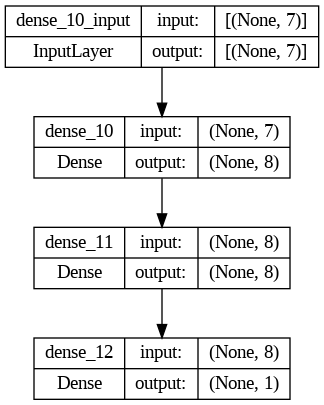

In [66]:
plot_model(model, show_shapes = True)

### 모델 컴파일

In [67]:
from tensorflow.keras import optimizers, losses, metrics

In [86]:
model.compile(optimizer = optimizers.Adam(),
              loss = losses.mean_squared_error,
            metrics = ['mean_squared_error','mean_absolute_error','accuracy']) # metrics는 추가로 점검하고 싶은 내용

### 모델 훈련

In [ ]:
"""배치사이즈란???
만약 총 85개의 문제가 있어.
그런데 그 중 만약 배치사이즉 32개라면
32개씩 끊어서 문제를 풀겠다는 거야.
32개 풀고, 32개 풀고, 21개 풀겠다.

epoch 란?
85개의 문제를 전체를 다 보고,
다시 복습하는 횟수

만약 epoch = 500, batchsize = 32 라면
 3번 씩 가중치 없데이트가 500번 일어나는 거야.

- 그럼 업데이트는 어느 수준까지 업데이트가 되는 거야????????

validation_split이란??
만약 전체를 계속 본다면 overfitting이 돼. 아주 작은 특징으로도 찾을 수 있다는 거야.
대신 기존 문제는 너무 잘 푸는데, 변형 문제는 거의 못풀게 돼.

그래서 이걸 막기 위해.
확인할 loss가 training_loss와 validation_loss 도 같이 봐.


?????? 나중에 validataion-loss를 파악하겠다는거야?? 둘이 다를 수 있으니까 쓴다는 건가?? 좀 어렵다.


call back 이 추가돼.
early stopping ---- 조기 종료.
ex)
EarlyStoopping(monitor = 'val_loss', patience = 3) #  val_loss를 파악해서 조기 종료할 거야. 근데 3번은 넘어가줄게.
올라가는이유 : validation은 변형된 문제니까. 가중치 업데이트는 train 데이터로만 하고 test를 validation 으로 하는거야.
그러니까 과적합의 기준이 될 수 있는거지 .

"""

In [87]:
# 모델 학습
model.fit(x = trainningDataFeatures, y = trainningDataLabel,
          batch_size = 32,
          epochs = 1000,
          validation_split = 0.2)
# 이 상황은 validation_split 으로 나누었기 때문에
# 68개만 보겠다는 거야.
# 32, 32, 4 이렇게 3번씩 학습되야해는 거야.

Epoch 1/1000
3/3 [==============================] - 1s 132ms/step - loss: 1926352.3750 - mean_squared_error: 1926352.3750 - mean_absolute_error: 1107.8376 - accuracy: 0.0000e+00 - val_loss: 2062949.6250 - val_mean_squared_error: 2062949.6250 - val_mean_absolute_error: 1226.4886 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 28ms/step - loss: 1926235.6250 - mean_squared_error: 1926235.6250 - mean_absolute_error: 1107.7860 - accuracy: 0.0000e+00 - val_loss: 2062741.1250 - val_mean_squared_error: 2062741.1250 - val_mean_absolute_error: 1226.4146 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 1926117.2500 - mean_squared_error: 1926117.2500 - mean_absolute_error: 1107.7354 - accuracy: 0.0000e+00 - val_loss: 2062534.6250 - val_mean_squared_error: 2062534.6250 - val_mean_absolute_error: 1226.3408 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 28ms/step - loss: 1925969.500

만약 이미지 검사에서 validation_data를 쓸 경우에는 랜덤이 아닌 경우가 있어.

그래서 validataion_tarin, validataion_test로 섞는 방법이 있어.

In [136]:
# model.fit(x = trainningDataFeatures, y = trainningDataLabel,
#           batch_size = 32,
#           epochs = 1000,
#         validataion_data = (testDataFeatures, testDataLabel))

TypeError: Model.fit() got an unexpected keyword argument 'validataion_data'

- 왜 훈련이 안될까??
    - 손실함수가 이미 수렴했다면 그 뒤는 학습이 안돼.
        - 보통 파라미터가 너무 적을 때 (node 수??)
        - 값의 범위가 너무 각자야. 특히 yearweek의 경우는 6자리로 구분이 돼.
            - scaling을 해야해. 안그럼 더 큰 범위를 중심으로 계산해.

### 예측하기

In [88]:
exceptFeature

['LE_HO',
 'LE_PM',
 'SE_HCLUS',
 'SE_YEARWEEK',
 'SE_PROPER',
 'SE_YEAR',
 'SE_WEEK']

In [114]:
inHclus = 1
inWeek = 20
inYearweek = 202420
inYear = 2024
inPro = 1
inHo = 1
inPromotion = 0.3

In [110]:
ywScaler.data_range_

array([151.])

In [134]:
(202420 - ywScaler.data_min_ ) / ywScaler.data_range_

array([6.08609272])

In [135]:
inYearweek

202420

In [92]:
hclusScaler.data_max_

inHclus = 1 / hclusScaler.data_max_[0]
inWeek = 20 / wkScaler.data_max_[0]
inYearweek = 202420 / ywScaler.data_max_[0]
inYear = 2024 / yrScaler.data_max_[0]
inPromotion = 0.3 / ppScaler.data_max_[0]

### 근데 MinMaxScaler인데 max만 나눠도 되나?

사실은 아래처럼 하는 것이 옳겠지

(202420 - ywScaler.data_min_ ) / ywScaler.data_range_

그렇지만 year의 경우는 미래의 값이 들어오기 때문에, 스케일을 해도 1을 넘게 돼

그래서 차라리 그 값을 없애는 것이 더 유리할 수도 있어.

In [130]:
 ywScaler.data_max_[0]

201652.0

In [119]:
# featureData.describe()

In [126]:
featureData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT', 'LE_HO',
       'LE_PM', 'SE_HCLUS', 'SE_YEARWEEK', 'SE_PROPER', 'SE_YEAR', 'SE_WEEK'],
      dtype='object')

In [128]:
featureData["NEW_PRO"] = ppScaler.inverse_transform( featureData[["SE_PROPER"]] )

In [129]:
featureData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HO,LE_PM,SE_HCLUS,SE_YEARWEEK,SE_PROPER,SE_YEAR,SE_WEEK,NEW_PRO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,0.25,0.000000,0.496439,0.0,0.000000,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1,1.00,0.006623,0.496439,0.0,0.019231,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1,1.00,0.013245,0.493388,0.0,0.038462,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1,0.50,0.019868,0.493388,0.0,0.057692,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1,1.00,0.026490,0.493388,0.0,0.076923,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1,0.00,0.973510,1.000000,1.0,0.903846,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,0,1,1.00,0.980132,1.000000,1.0,0.923077,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,0,1,1.00,0.986755,0.835198,1.0,0.942308,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,0,1,1.00,0.993377,0.835198,1.0,0.961538,0.352361


In [121]:
wkScaler.inverse_transform([[20 / wkScaler.data_max_[0]]])

array([[2015.00992063]])

In [93]:
test = pd.DataFrame([[inHo,inPro,inHclus,inYearweek,inPromotion,inYear,inWeek]])

In [137]:
# predict
pred = model.predict(testDataFeatures)

1/1 [==============================] - 0s 22ms/step


In [141]:
test_copy = testDataLabel.copy()

In [142]:
test_copy

,QTY
85,43
86,1700
87,1514
88,1501
89,1491
90,806
91,2111
92,2400
93,2010
94,1900


In [143]:
test_copy['DNN_predict'] = pred

In [160]:
test_copy

,QTY,DNN_predict,accuracy1,accuracy2
85,0,0.000000,0.000000,NaN
86,1700,1739.391602,0.976828,0.977353
87,1514,1745.808960,0.846890,0.867220
88,1501,1752.226440,0.832627,0.856624
89,1491,1308.641357,0.877694,0.860650
90,806,1315.058716,0.368414,0.612900
91,2111,1290.050781,0.611109,0.363630
92,2400,1296.468262,0.540195,0.148817
93,2010,1762.202026,0.876717,0.859382
94,1900,1309.303223,0.689107,0.548846


In [ ]:
# MAPE 활용 1 accuracy = 1-ABS( act - fcst) / act
# 과다예측한ㄴ 곳에 DISADVANTAGE 를 준다.
# MAPE 활용 2 accuracy = 1- abs( FCST - ACT) / GCST
# 2의 경우 과다 예측한 곳에 정확도를 주고 소량예측에는 DISADVANTAGE - 적어도 부족하게는 하지 말자 이런 느낌?

In [146]:
test_copy['accuracy1'] = 1 - abs(test_copy.QTY - test_copy.DNN_predict) / test_copy.QTY

In [153]:
test_copy['accuracy2'] = 1 - abs( test_copy.DNN_predict - test_copy.QTY) / test_copy.DNN_predict


In [148]:
test_copy.loc[test_copy['accuracy1'] < 0] = 0

In [150]:
test_copy.accuracy1.mean()

0.6512698064095244

In [162]:
test_copy.fillna(0).accuracy2.mean()


0.6186062863338015

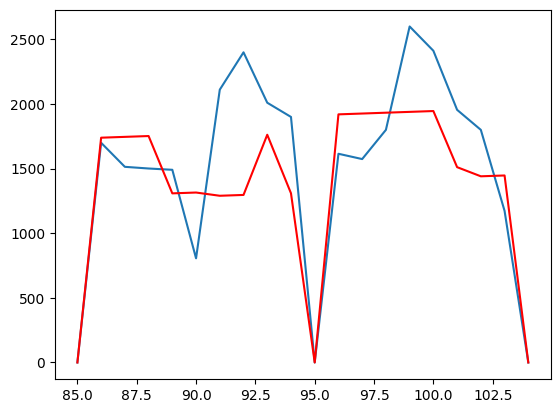

In [152]:
# 사실 이 데이터가 굉장히 어려운 데이터야.

plt.plot(test_copy.index, test_copy.QTY)
plt.plot(test_copy.index, test_copy.DNN_predict, 'r')

이렇게 극단적인 데이터가 있는 경우는 딥러닝보다 의사결정나무 같은 머신러닝 기법이 더 잘 되는 경우가 있어.

#### 추가적인 예측 정확도 팁

예측 타임에 대해서

예측모델을 만든 시점에 따라 정확도가 달라.

- 가전제품은 8주, 음식은 6주 등
    - 필요한 예측 타임은, 고객에게 전달되는 그 시점만큼의 데이터로 예측한 모델이 필요한거야.

그래서 총 8개의 정확도를 다 보는 건가??

아카이브란?

if 8주 아카이브라면 ,
1주 전, ~ 8주 전까지 값을 변경해가며 정확도를 모두 측정해야해.

심지어 각각의 정확도 간에 중욛의 정도도 다르기 때문에.

중요도가 높은 대상의 정확도가 높아야 하니까

가중치의 개념이 도입 되었어.

그래서 정확도에 가중치를 곱해주는 거야.
